In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
import sklearn
from scipy import stats as st

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def plot_coefficients(classifier, feature_names, top_features=20):
  coef = classifier.coef_.ravel()
  top_positive_coefficients = np.argsort(coef)[-top_features:]
  top_negative_coefficients = np.argsort(coef)[:top_features]
  top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
  # create plot
  plt.figure(figsize=(15, 5))
  colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
  plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
  feature_names = np.array(feature_names)
  plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
  plt.show()

In [3]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [4]:
#the workbook object created above, wb, allows us to specify which sheet we want by using the worksheet() function. 
#This simply allows you to specify the sheet you want by just calling the name of the sheet.
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/FYP data set/fyp_data_2.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.head()

,USER,T_first_click,Avg_D_rest,no_of_rests,Time_on_page,no_of_Clicks,no_of_back_forth_mov,No_of_wild_mov,cognitive_1,congnitive_2,...,dialogs_2,simplicity_1,simplicity_2,affordance_!,affordance_2,acceptablilty_1,acceptablity_2,feedback_1,feedback_2,Satisfied
0,8,12452,2601,15,24394,29,13,13,5,2,...,3,3,2,3,4,5,2,1,4,1
1,23,10198,3122,17,26608,43,14,14,4,4,...,4,3,3,3,3,5,2,1,4,1
2,35,13174,3025,21,22020,40,19,10,5,2,...,2,1,5,5,4,5,2,1,4,1
3,19,12212,2792,20,27438,35,19,9,5,2,...,4,3,3,5,5,5,2,2,1,1
4,32,10932,2712,16,27536,33,15,10,5,3,...,4,3,3,4,5,3,3,1,3,1


In [6]:
df.corr()

,USER,T_first_click,Avg_D_rest,no_of_rests,Time_on_page,no_of_Clicks,no_of_back_forth_mov,No_of_wild_mov,cognitive_1,congnitive_2,...,dialogs_2,simplicity_1,simplicity_2,affordance_!,affordance_2,acceptablilty_1,acceptablity_2,feedback_1,feedback_2,Satisfied
USER,1.000000,0.013598,0.147506,0.127687,-0.131537,-0.061481,0.062183,-0.069430,-0.059416,-0.298832,...,-0.134991,0.150827,0.011386,6.433535e-02,0.049473,-0.098670,-0.059212,-0.070570,-0.036253,5.671240e-02
T_first_click,0.013598,1.000000,-0.665405,0.298964,0.620312,-0.080444,0.589534,0.489700,0.511202,0.354645,...,0.484311,-0.493179,0.519609,4.499606e-01,0.419766,0.764157,-0.181685,0.149183,0.187235,2.447914e-01
Avg_D_rest,0.147506,-0.665405,1.000000,-0.292951,-0.680092,0.167164,-0.537166,-0.547246,-0.554167,-0.456747,...,-0.466026,0.429173,-0.398148,-5.903195e-01,-0.308439,-0.725270,0.166073,-0.250645,-0.272402,-3.931417e-01
no_of_rests,0.127687,0.298964,-0.292951,1.000000,0.117609,0.096696,0.004829,-0.104483,0.071026,0.023697,...,0.181414,-0.180279,0.119572,2.763071e-02,0.056879,0.139007,0.265986,-0.030992,0.097841,1.897801e-01
Time_on_page,-0.131537,0.620312,-0.680092,0.117609,1.000000,-0.043764,0.649480,0.617733,0.679422,0.405558,...,0.586172,-0.316663,0.467750,4.383593e-01,0.415248,0.698487,-0.155725,0.235409,0.403210,7.845745e-02
no_of_Clicks,-0.061481,-0.080444,0.167164,0.096696,-0.043764,1.000000,-0.045078,-0.081034,0.056173,0.057224,...,0.079685,-0.184960,-0.025548,1.381414e-01,-0.280307,-0.041781,0.040749,0.020029,0.007143,-1.783933e-01
no_of_back_forth_mov,0.062183,0.589534,-0.537166,0.004829,0.649480,-0.045078,1.000000,0.675395,0.543966,0.304103,...,0.400263,-0.563199,0.481278,6.212521e-01,0.370330,0.601576,-0.264258,0.216105,0.243892,1.915012e-01
No_of_wild_mov,-0.069430,0.489700,-0.547246,-0.104483,0.617733,-0.081034,0.675395,1.000000,0.541054,0.406541,...,0.555053,-0.442906,0.523013,3.881032e-01,0.419357,0.552548,-0.236305,0.201231,0.324876,7.087108e-02
cognitive_1,-0.059416,0.511202,-0.554167,0.071026,0.679422,0.056173,0.543966,0.541054,1.000000,0.261635,...,0.431343,-0.341802,0.264377,4.918438e-01,0.461519,0.531502,-0.162721,0.085545,0.334737,3.071095e-01
congnitive_2,-0.298832,0.354645,-0.456747,0.023697,0.405558,0.057224,0.304103,0.406541,0.261635,1.000000,...,0.412349,-0.259294,0.373561,1.849613e-01,0.189395,0.383331,0.036409,0.343609,0.413697,5.362067e-02


In [7]:
df.describe()

,USER,T_first_click,Avg_D_rest,no_of_rests,Time_on_page,no_of_Clicks,no_of_back_forth_mov,No_of_wild_mov,cognitive_1,congnitive_2,...,dialogs_2,simplicity_1,simplicity_2,affordance_!,affordance_2,acceptablilty_1,acceptablity_2,feedback_1,feedback_2,Satisfied
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.00000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,10580.500000,3004.925000,17.475000,21257.05000,37.650000,12.87500,10.425000,3.325000,3.275000,...,2.750000,2.425000,3.575000,3.800000,3.850000,3.450000,2.950000,1.400000,2.350000,0.700000
std,11.690452,2219.310149,857.660096,2.241651,6240.30803,5.636647,5.62589,2.416689,1.421222,1.339489,...,1.056118,1.083383,1.059451,1.159133,0.975337,1.600481,0.814925,0.590523,1.210001,0.464095
min,1.000000,6209.000000,1978.000000,13.000000,10092.00000,29.000000,3.00000,6.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000
25%,10.750000,8868.750000,2423.000000,16.000000,18083.25000,33.000000,11.00000,8.750000,2.000000,2.000000,...,2.000000,1.750000,3.000000,3.000000,3.000000,2.750000,2.000000,1.000000,1.000000,0.000000
50%,20.500000,11074.000000,2775.500000,17.000000,21692.00000,37.500000,14.00000,10.500000,3.000000,3.000000,...,3.000000,3.000000,3.500000,4.000000,4.000000,3.500000,3.000000,1.000000,2.000000,1.000000
75%,30.250000,12235.750000,3227.750000,18.250000,26653.25000,43.000000,17.00000,12.000000,5.000000,5.000000,...,4.000000,3.000000,4.250000,5.000000,5.000000,5.000000,4.000000,2.000000,4.000000,1.000000
max,40.000000,13806.000000,4975.000000,21.000000,30289.00000,46.000000,20.00000,14.000000,5.000000,5.000000,...,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,2.000000,4.000000,1.000000


In [8]:
perc = [0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]
df.describe(percentiles =perc)

,USER,T_first_click,Avg_D_rest,no_of_rests,Time_on_page,no_of_Clicks,no_of_back_forth_mov,No_of_wild_mov,cognitive_1,congnitive_2,...,dialogs_2,simplicity_1,simplicity_2,affordance_!,affordance_2,acceptablilty_1,acceptablity_2,feedback_1,feedback_2,Satisfied
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.00000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,10580.500000,3004.925000,17.475000,21257.05000,37.650000,12.87500,10.425000,3.325000,3.275000,...,2.750000,2.425000,3.575000,3.800000,3.850000,3.450000,2.950000,1.400000,2.350000,0.700000
std,11.690452,2219.310149,857.660096,2.241651,6240.30803,5.636647,5.62589,2.416689,1.421222,1.339489,...,1.056118,1.083383,1.059451,1.159133,0.975337,1.600481,0.814925,0.590523,1.210001,0.464095
min,1.000000,6209.000000,1978.000000,13.000000,10092.00000,29.000000,3.00000,6.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000
1%,1.390000,6303.380000,2023.630000,13.390000,10169.61000,29.000000,3.00000,6.000000,1.000000,1.390000,...,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000
5%,2.950000,6894.650000,2102.600000,14.000000,10903.75000,29.000000,3.95000,6.000000,1.000000,2.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.950000,1.000000,0.000000
10%,4.900000,7219.700000,2185.700000,14.900000,11359.40000,29.900000,4.00000,7.000000,1.000000,2.000000,...,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,0.000000
25%,10.750000,8868.750000,2423.000000,16.000000,18083.25000,33.000000,11.00000,8.750000,2.000000,2.000000,...,2.000000,1.750000,3.000000,3.000000,3.000000,2.750000,2.000000,1.000000,1.000000,0.000000
50%,20.500000,11074.000000,2775.500000,17.000000,21692.00000,37.500000,14.00000,10.500000,3.000000,3.000000,...,3.000000,3.000000,3.500000,4.000000,4.000000,3.500000,3.000000,1.000000,2.000000,1.000000
75%,30.250000,12235.750000,3227.750000,18.250000,26653.25000,43.000000,17.00000,12.000000,5.000000,5.000000,...,4.000000,3.000000,4.250000,5.000000,5.000000,5.000000,4.000000,2.000000,4.000000,1.000000


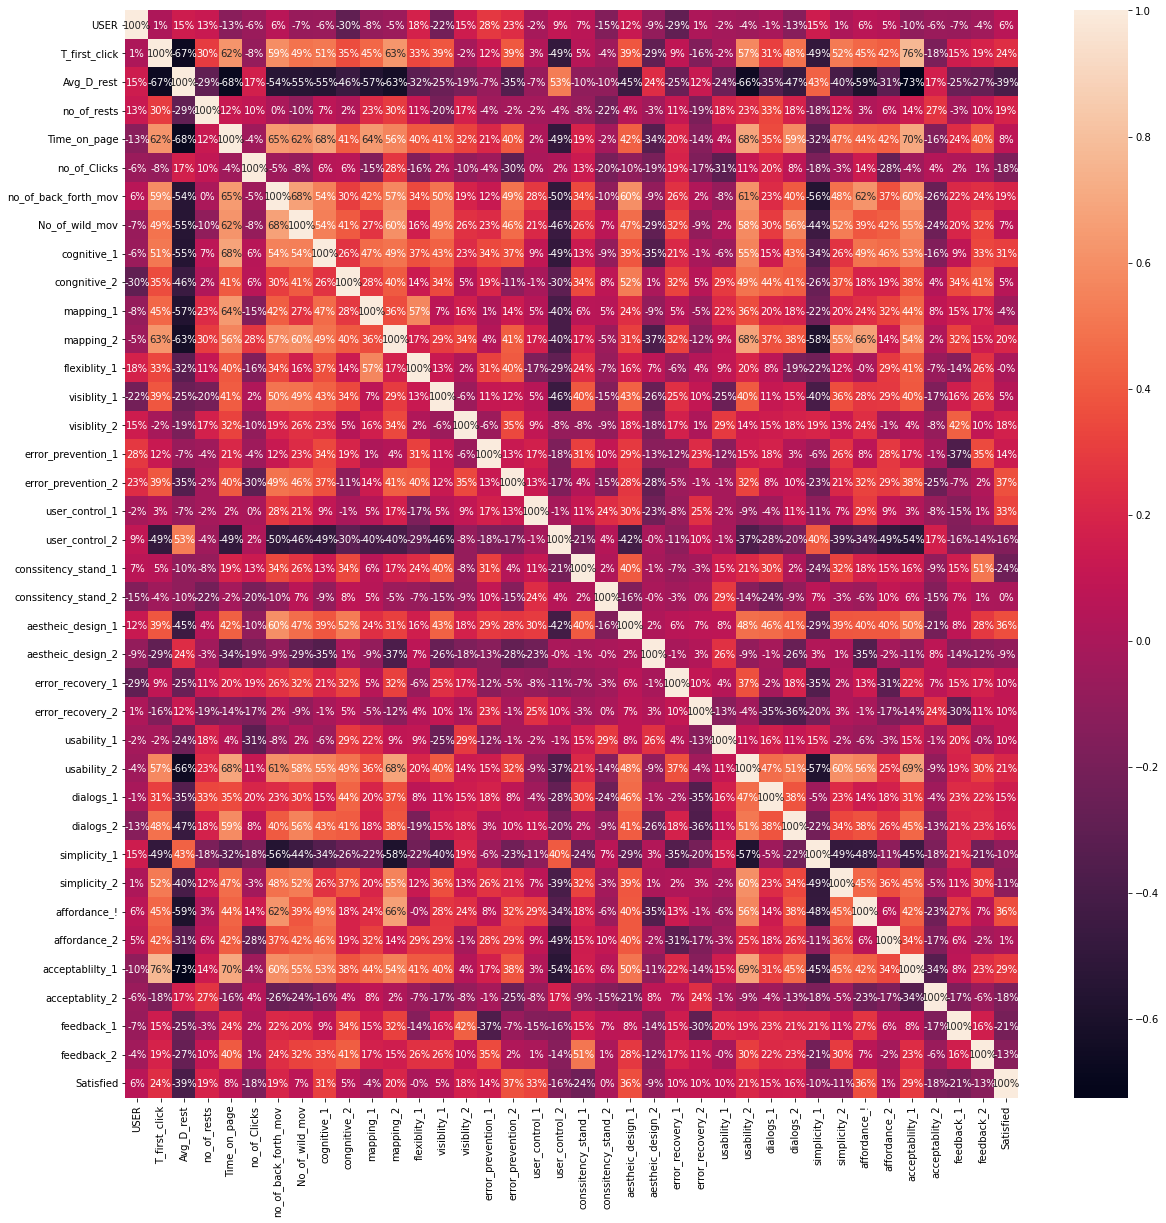

In [9]:
plt.figure(figsize = (20,20))

ax = sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [10]:
#df  = df.iloc[: , :8]

In [11]:
df.nunique()

USER                    40
T_first_click           40
Avg_D_rest              40
no_of_rests              9
Time_on_page            40
no_of_Clicks            18
no_of_back_forth_mov    10
No_of_wild_mov           9
cognitive_1              5
congnitive_2             5
mapping_1                4
mapping_2                5
flexiblity_1             4
visiblity_1              4
visiblity_2              4
error_prevention_1       3
error_prevention_2       5
user_control_1           4
user_control_2           4
conssitency_stand_1      4
conssitency_stand_2      4
aestheic_design_1        4
aestheic_design_2        4
error_recovery_1         4
error_recovery_2         3
usability_1              3
usability_2              5
dialogs_1                4
dialogs_2                4
simplicity_1             5
simplicity_2             4
affordance_!             4
affordance_2             4
acceptablilty_1          6
acceptablity_2           3
feedback_1               3
feedback_2               4
S

Apply t-test to find out how significant is the relationship of each explanatory variable with target variable 

In [12]:
for feature_name in df.columns:
    a = df.loc[df['Satisfied']==1, feature_name]
    b = df.loc[df['Satisfied']==0, feature_name]
    print('t-test results for: ', feature_name)
    print(st.ttest_ind(a,b))


t-test results for:  USER
Ttest_indResult(statistic=0.350162256401247, pvalue=0.7281504600905266)
t-test results for:  T_first_click
Ttest_indResult(statistic=1.556345931203159, pvalue=0.12791615278218793)
t-test results for:  Avg_D_rest
Ttest_indResult(statistic=-2.63572202495917, pvalue=0.0120879162655729)
t-test results for:  no_of_rests
Ttest_indResult(statistic=1.1915375779786959, pvalue=0.24083162189889853)
t-test results for:  Time_on_page
Ttest_indResult(statistic=0.4851396416612146, pvalue=0.6303625342193918)
t-test results for:  no_of_Clicks
Ttest_indResult(statistic=-1.1176176384993954, pvalue=0.2707466584583987)
t-test results for:  no_of_back_forth_mov
Ttest_indResult(statistic=1.20275251221791, pvalue=0.23651284137134437)
t-test results for:  No_of_wild_mov
Ttest_indResult(statistic=0.43797995758037706, pvalue=0.6638804579399269)
t-test results for:  cognitive_1
Ttest_indResult(statistic=1.9892838221696785, pvalue=0.05390368031821413)
t-test results for:  congnitive_2
Tte

In [13]:
X = df.drop(['Satisfied','USER'], axis=1) #contains all the Independent variables
y = df['Satisfied'] #contains the target variable
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (40, 36) | y shape: (40,) 


Normalize Data 

In [14]:
for feature_name in df.columns:
    df[feature_name] = df[feature_name] / df[feature_name].std()

In [15]:
df

,USER,T_first_click,Avg_D_rest,no_of_rests,Time_on_page,no_of_Clicks,no_of_back_forth_mov,No_of_wild_mov,cognitive_1,congnitive_2,...,dialogs_2,simplicity_1,simplicity_2,affordance_!,affordance_2,acceptablilty_1,acceptablity_2,feedback_1,feedback_2,Satisfied
0,0.684319,5.610753,3.032670,6.691496,3.909102,5.144902,2.310745,5.379261,3.518099,1.493107,...,2.840592,2.769105,1.887771,2.588141,4.101147,3.124061,2.454214,1.693413,3.305782,2.154729
1,1.967418,4.595122,3.640137,7.583696,4.263892,7.628648,2.488495,5.793050,2.814479,2.986213,...,3.787457,2.769105,2.831656,2.588141,3.075860,3.124061,2.454214,1.693413,3.305782,2.154729
2,2.993896,5.936079,3.527038,9.368094,3.528672,7.096417,3.377243,4.137893,3.518099,1.493107,...,1.893728,0.923035,4.719427,4.313568,4.101147,3.124061,2.454214,1.693413,3.305782,2.154729
3,1.625258,5.502611,3.255369,8.921995,4.396898,6.209365,3.377243,3.724104,3.518099,1.493107,...,3.787457,2.769105,2.831656,4.313568,5.126434,3.124061,2.454214,3.386826,0.826446,2.154729
4,2.737277,4.925855,3.162092,7.137596,4.412603,5.854544,2.666245,4.137893,3.518099,2.239660,...,3.787457,2.769105,2.831656,3.450855,5.126434,1.874437,3.681321,1.693413,2.479337,2.154729
5,0.342160,5.340398,2.442693,7.583696,3.172760,5.677133,3.021744,4.137893,1.407240,2.986213,...,2.840592,0.923035,3.775541,4.313568,3.075860,3.124061,3.681321,1.693413,1.652891,2.154729
6,1.454178,5.053823,3.659958,8.029795,3.262499,6.031954,2.666245,4.551683,1.407240,2.986213,...,1.893728,0.923035,3.775541,2.588141,4.101147,3.124061,4.908428,1.693413,0.826446,2.154729
7,0.171080,4.054413,2.630413,8.029795,4.827005,7.806058,2.666245,4.551683,3.518099,3.732767,...,3.787457,0.923035,2.831656,4.313568,3.075860,1.874437,4.908428,1.693413,3.305782,2.154729
8,2.224037,6.057738,3.567847,7.137596,4.292897,7.628648,3.021744,4.551683,3.518099,1.493107,...,3.787457,1.846070,4.719427,4.313568,5.126434,3.124061,2.454214,1.693413,1.652891,2.154729
9,1.112019,5.830641,2.963878,9.368094,4.593203,5.499723,2.310745,4.551683,2.110860,3.732767,...,3.787457,2.769105,3.775541,2.588141,4.101147,2.499249,4.908428,1.693413,2.479337,2.154729


In [16]:
LR_Model = LogisticRegression(random_state=0, max_iter=5000)
scores = cross_val_score(LR_Model, X, y, cv=20, scoring = 'f1')


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  UserWarning,


In [17]:
print(scores.mean())

0.7166666666666666


In [18]:
DT_Model = tree.DecisionTreeClassifier(random_state=0)
scores = cross_val_score(DT_Model, X, y, cv=20, scoring = 'f1')
print(scores.mean())

0.7166666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  UserWarning,


In [19]:
RF_Model = RandomForestClassifier(random_state=0,n_estimators=300)
scores = cross_val_score(RF_Model, X, y, cv=20, scoring = 'f1')
print(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  UserWarning,


0.7166666666666666


In [20]:
LinearSVC_Model = LinearSVC(max_iter=5000,random_state=0)
scores = cross_val_score(LinearSVC_Model, X, y, cv=20, scoring = 'f1')


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, in

In [21]:
print(scores.mean())

0.7499999999999999


In [22]:

LR_Model.fit(X, y)
DT_Model.fit(X, y)
RF_Model.fit(X,y)
LinearSVC_Model.fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(max_iter=5000, random_state=0)

In [23]:
import math 

w = LR_Model.coef_[0]
print(w)

[ 2.46186609e-05 -1.25453394e-03  3.83705064e-01 -2.17067169e-04
 -9.72864142e-02 -3.24464870e-02 -3.55060030e-01  7.58476830e-01
  3.35061200e-02 -5.15059434e-01 -1.30752672e-01 -2.29061839e-01
  2.50355593e-01  3.59112607e-01  2.32235292e-01  7.47971300e-01
  8.36846009e-01  5.19814970e-02 -5.95760896e-01  5.17536879e-02
  8.32581970e-01  1.28083037e-01  2.45614490e-01  2.57861911e-01
 -3.02949853e-02  2.80091431e-01  3.35945142e-01  3.14619767e-01
  2.09883508e-01 -6.47010317e-01  6.96027664e-01 -2.36318514e-01
  2.08104180e-01 -1.10874026e-01 -4.97211393e-01 -4.19912789e-01]


Text(0.5, 0, 'Importance')

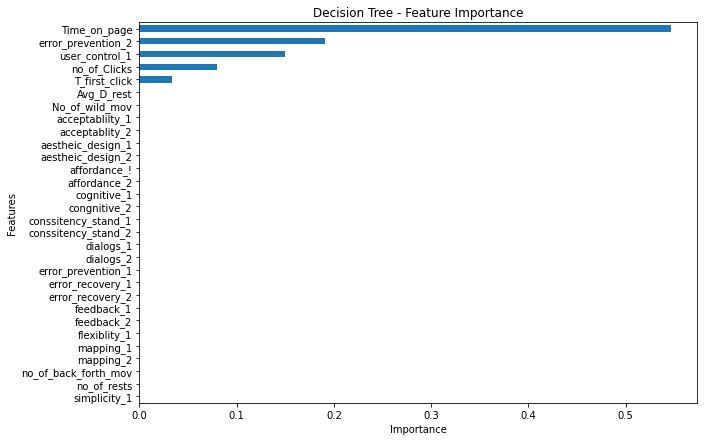

In [24]:
fea_imp = pd.DataFrame({'imp': DT_Model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Decision Tree - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

Text(0.5, 0, 'Importance')

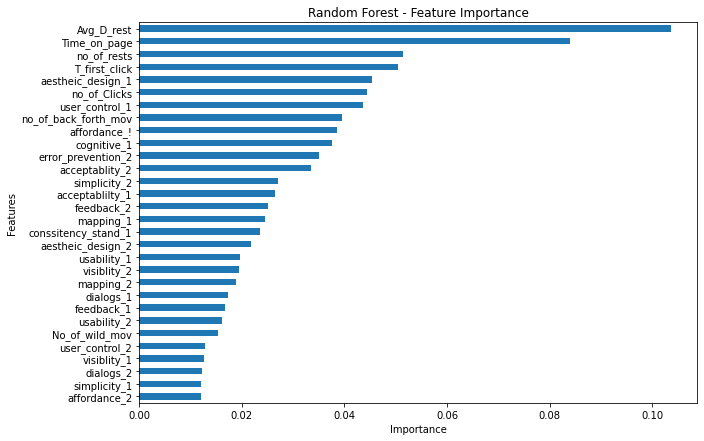

In [25]:
fea_imp = pd.DataFrame({'imp': RF_Model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Random Forest - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

[Text(0.4444444444444444, 0.9166666666666666, 'X[3] <= 10960.5\ngini = 0.42\nsamples = 40\nvalue = [12, 28]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5555555555555556, 0.75, 'X[16] <= 2.5\ngini = 0.368\nsamples = 37\nvalue = [9, 28]'),
 Text(0.3333333333333333, 0.5833333333333334, 'X[3] <= 23949.5\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.2222222222222222, 0.4166666666666667, 'X[15] <= 0.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.4444444444444444, 0.4166666666666667, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.7777777777777778, 0.5833333333333334, 'X[3] <= 30205.5\ngini = 0.165\nsamples = 22\nvalue = [2, 20]'),
 Text(0.6666666666666666, 0.4166666666666667, 'X[0] <= 13257.0\ngini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Text(0.5555555555555556, 0.25, 'gini =

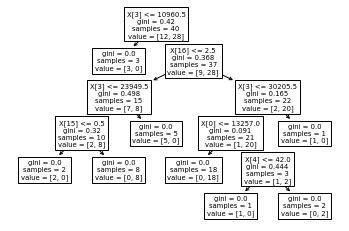

In [26]:
tree.plot_tree(DT_Model)

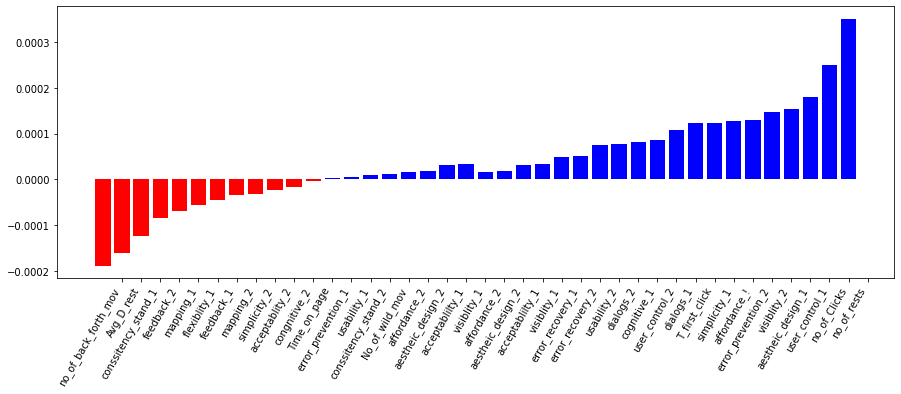

In [27]:
plot_coefficients(LinearSVC_Model, X.columns)

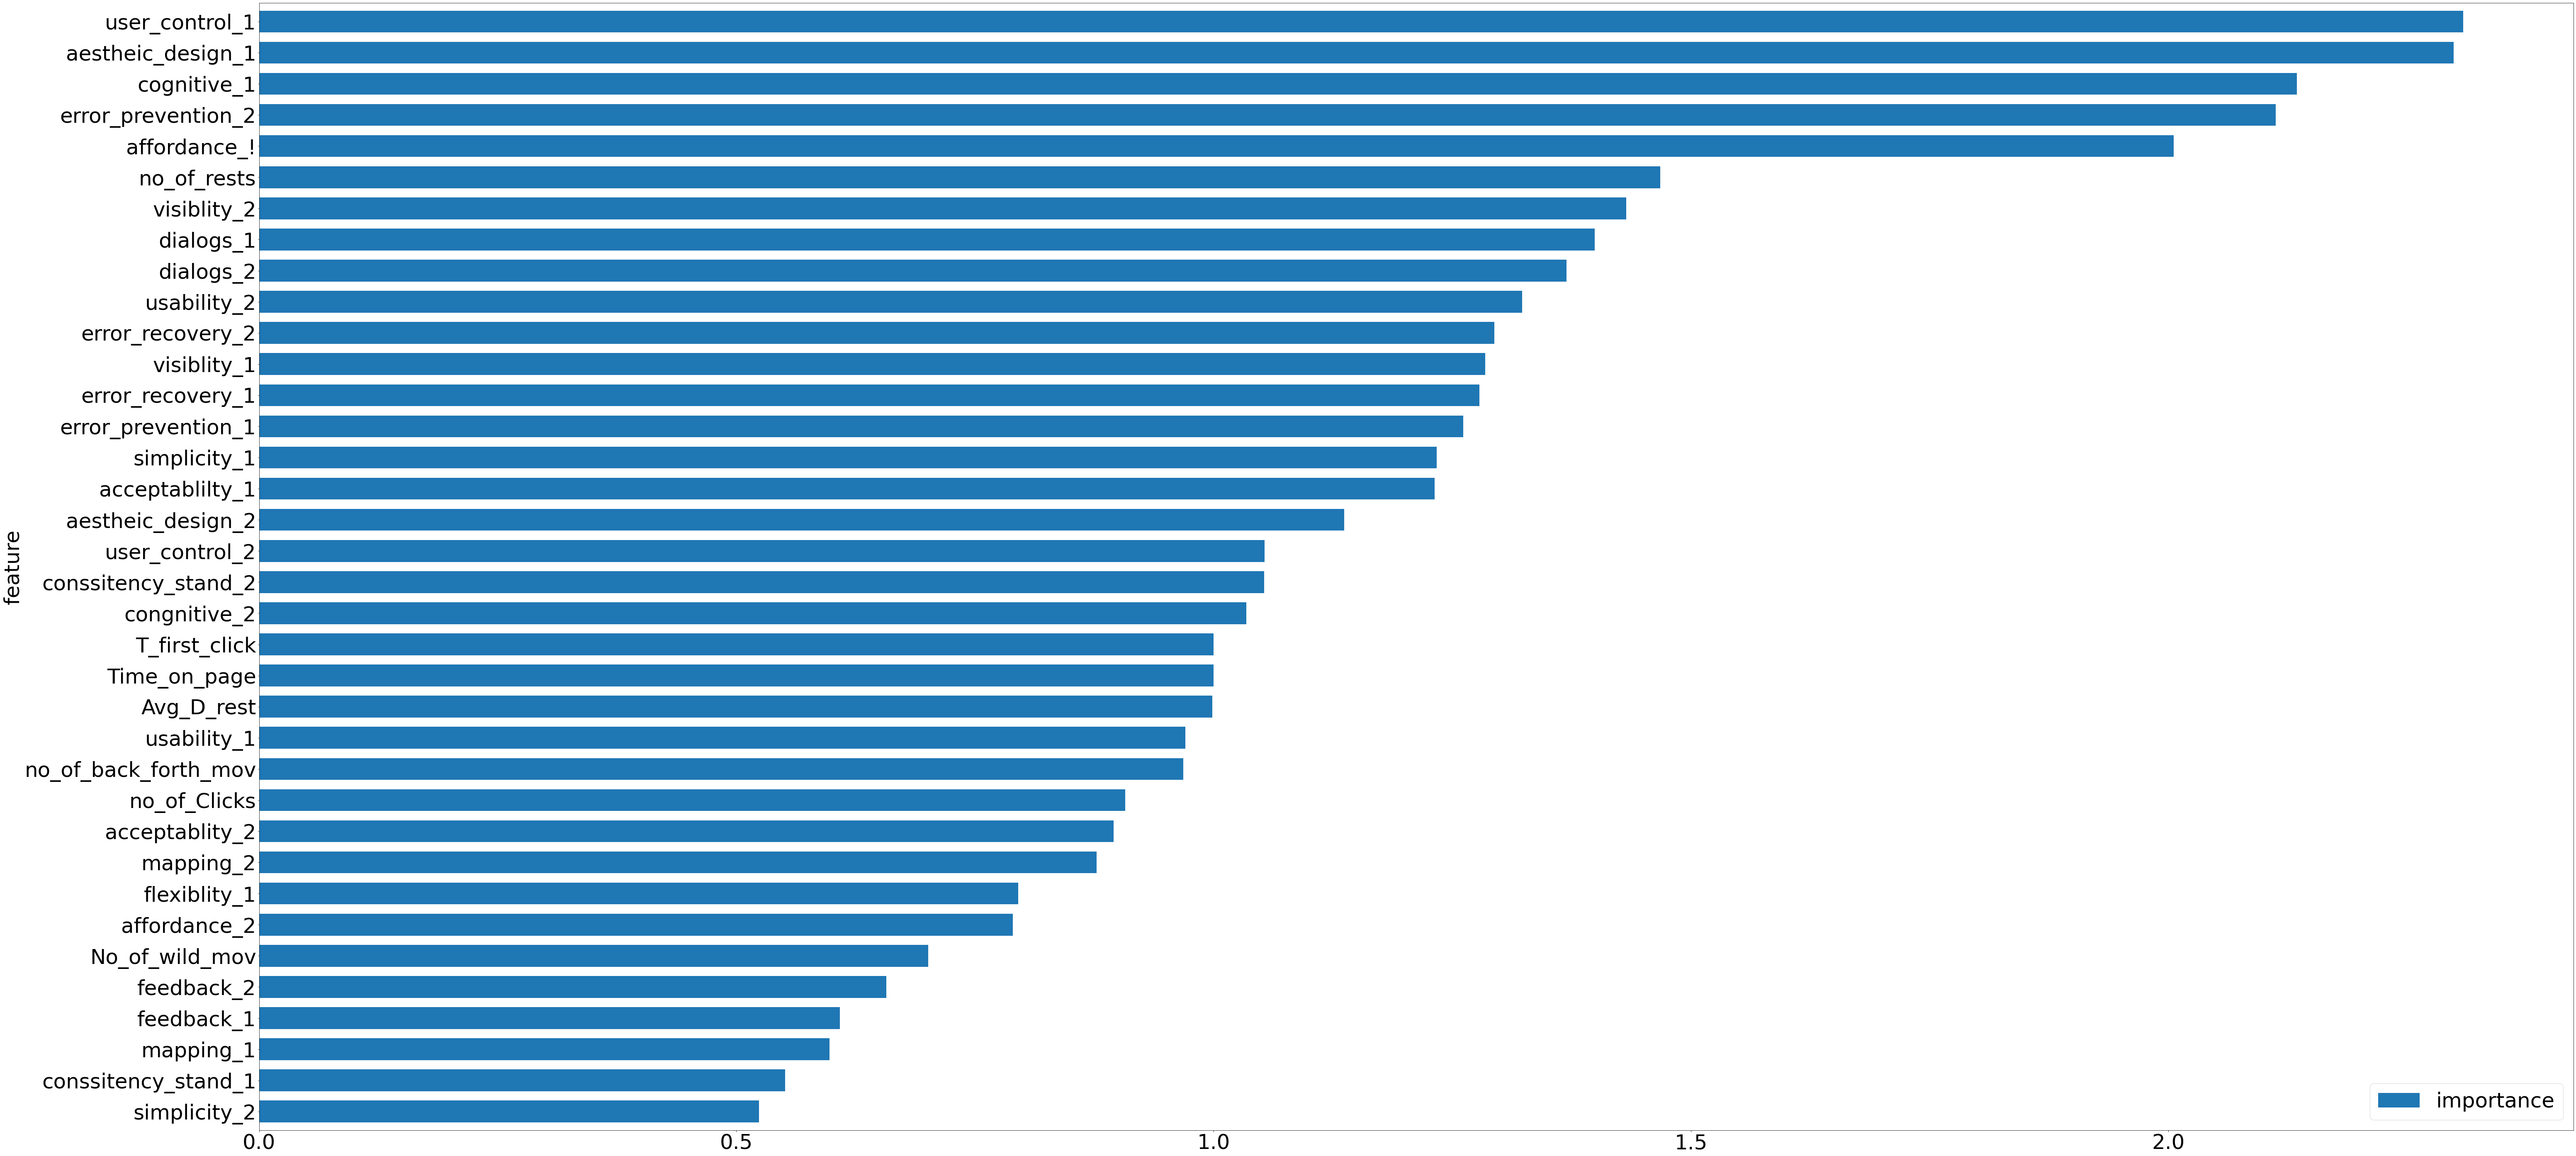

In [28]:
from matplotlib.pyplot import figure


feature_importance = pd.DataFrame(X.columns, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
plt.rcParams["figure.figsize"] = (100,50)
plt.rcParams.update({'font.size': 50})
ax = feature_importance.plot.barh(x='feature', y='importance',width=0.7)
plt.show()